<br>DEBUG：
<br>x作列，y作行这样才与X,Y=np.meshgrid(xlist,ylist)匹配
<br>一定要清洗数据,剔除圆环附近的点,否则会乱成一团,至于剔除的点时所选的参数要好好考究才能画出漂亮的图

<br>PRO:
<br>实现三维计算,任意维度通用
<br>计算电四、电八、电十六极子的电势与电场分布

<br>Todo:
<br>给图片加上标题

<br>QUS：
<br>fig, ax = plt.subplots()?
<br>怎么找到矩阵中前n大的元素？如何将矩阵的全部元素进行排序?
<br>怎么在ax1中显示colorbar?
<br>怎么把图片画地既清楚又明亮
<br>如何把坐标去掉
<br>各参数影响什么(图片清晰度,运行时间)
<br>这个程序的计算量有多大,如果是三维的计算量又会有多大,以此判定能否计算三维问题

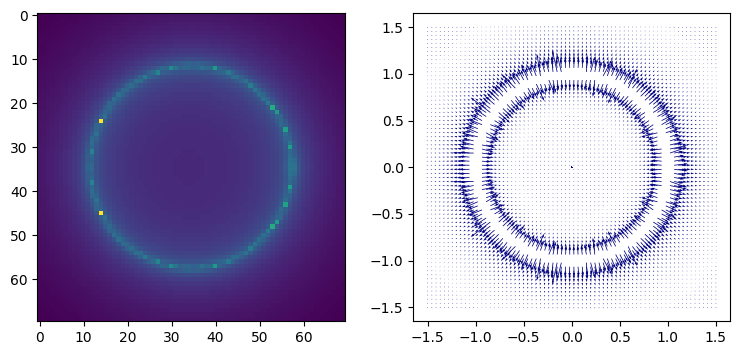

In [48]:
%reset -f
import numpy as np
epsilon0=1
k=1/(4*np.pi*epsilon0)
def point(r0,r,q):
    '''点电荷在空间某点产生的计算电势
    任何维度通用'''
    dim=len(r0)#获取维数
    R=r-r0#只有np.array创造的向量才能进行加减运算,直接用[]创建的是列表,会报错
    norm=np.linalg.norm(R)
    potential=k*q/norm
    E=np.zeros(dim)
    for n in range(dim):
        E[n]=k*q*R[n]/norm**3
    return potential,E
#圆环在空间某点产生的电势
R,Q=1,10
Ntheta=100
thetalist=np.linspace(0,2*np.pi,Ntheta)
def ring(r):
    '''可以改变电荷分布方程来表现任何电荷分布在空间中的势与场'''
    x0list=np.cos(thetalist)*R#圆环的中心在原点
    y0list=np.sin(thetalist)*R
    delta_L=R*(thetalist[1]-thetalist[0])
    Lamda=Q/(2*np.pi*R)
    deltaq=Lamda*delta_L
    N=len(x0list)
    potential=0
    E=np.zeros(2)
    for n in range(N):
        r0n=np.array((x0list[n],y0list[n]))
        phin,En=point(r0n,r,deltaq)
        potential=potential+phin
        E=E+En
    return potential,E
#圆环在全空间产生的电势
Nx,Ny=70,70
xlist=np.linspace(-1.5,1.5,Nx)
ylist=np.linspace(-1.5,1.5,Ny)
phimat=np.zeros((Nx,Ny))
Exmat=np.zeros((Nx,Ny))
Eymat=np.zeros((Nx,Ny))
for i in range(Ny):
    yi=ylist[i]
    for j in range(Nx):
        xj=xlist[j]
        r=np.array((xj,yi))
        phir,Er=ring(r)
        phimat[i,j]=phir
        Exmat[i,j],Eymat[i,j]=Er[0],Er[1]
X,Y=np.meshgrid(xlist,ylist)
#清洗数据
std,__=ring([1.05,0])#使用"_"忽略此处的返回值
index=phimat>std
X[index],Y[index]=0,0
Exmat[index],Eymat[index]=0,0
#作图
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(9,4))
ax1=fig.add_subplot(1,2,1)
ax1.imshow(phimat)
# plt.colorbar()
ax2=fig.add_subplot(1,2,2)
ax2.quiver(X,Y,Exmat,Eymat,color='navy')
plt.show()